<a href="https://colab.research.google.com/github/rhanilham/PCVK/blob/main/Jobsheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import folder yang ada di Drive anda dengan cara berikut

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

3.  Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.


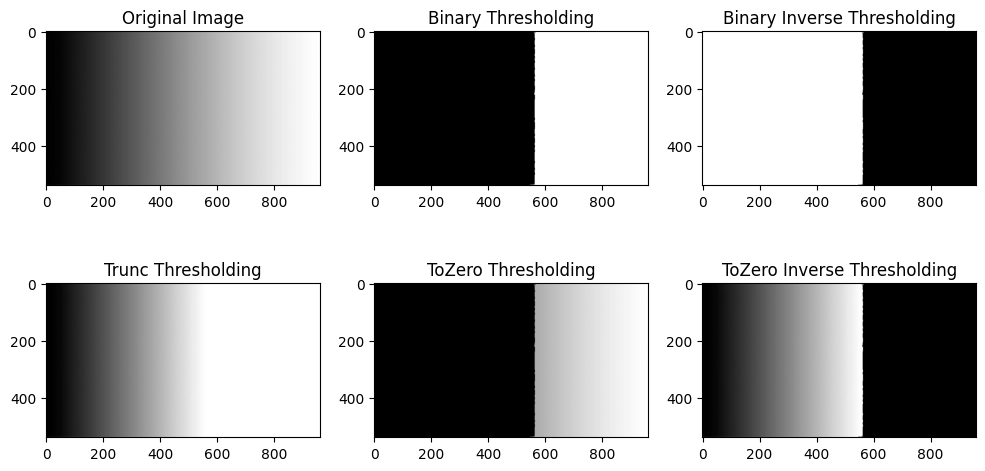

In [4]:
original_image = cv2.imread('/content/drive/MyDrive/PCVK/images/gradient.jpg', 0)

ret, binary_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_BINARY)

ret, binary_inv_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_BINARY_INV)

ret, trunc_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_TRUNC)

ret, tozero_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_TOZERO)

ret, tozero_inv_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Binary Thresholding')
plt.imshow(binary_threshold, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Binary Inverse Thresholding')
plt.imshow(binary_inv_threshold, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Trunc Thresholding')
plt.imshow(trunc_threshold, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('ToZero Thresholding')
plt.imshow(tozero_threshold, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('ToZero Inverse Thresholding')
plt.imshow(tozero_inv_threshold, cmap='gray')

plt.show()


4.  Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

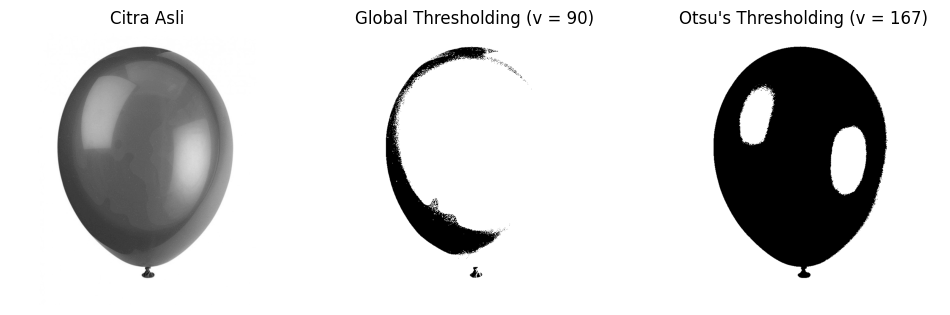

In [5]:
original_image = cv2.imread('/content/drive/MyDrive/PCVK/images/balloon.jpg', 0)

if original_image is None:
    print("Image not found or could not be loaded.")
else:
    hist = cv2.calcHist([original_image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()
    q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1

    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])  # Probabilities
        q1, q2 = q[i], q[-1] - q[i]  # Cumulative distribution function
        b1, b2 = np.hsplit(bins, [i])  # Weighted means

        # Calculate the variance between classes
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2

        # Calculate the minimization function
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i

    global_threshold = 90
    otsu_threshold = 167

    global_thresholded = np.where(original_image > global_threshold, 255, 0)
    otsu_thresholded = np.where(original_image > otsu_threshold, 255, 0)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Citra Asli')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f'Global Thresholding (v = {global_threshold})')
    plt.imshow(global_thresholded, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f"Otsu's Thresholding (v = {otsu_threshold})")
    plt.imshow(otsu_thresholded, cmap='gray')
    plt.axis('off')

    plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

- anda dapat gunakan cv.calcHist untuk menampilkan histogram.

- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

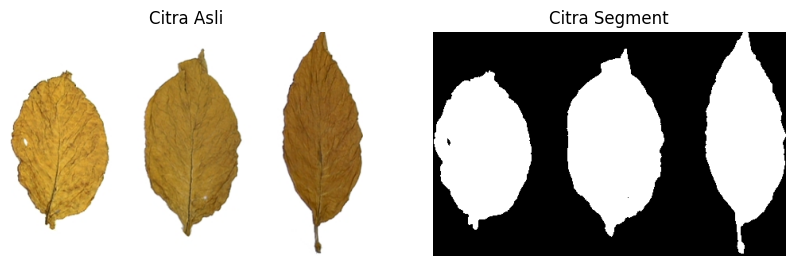

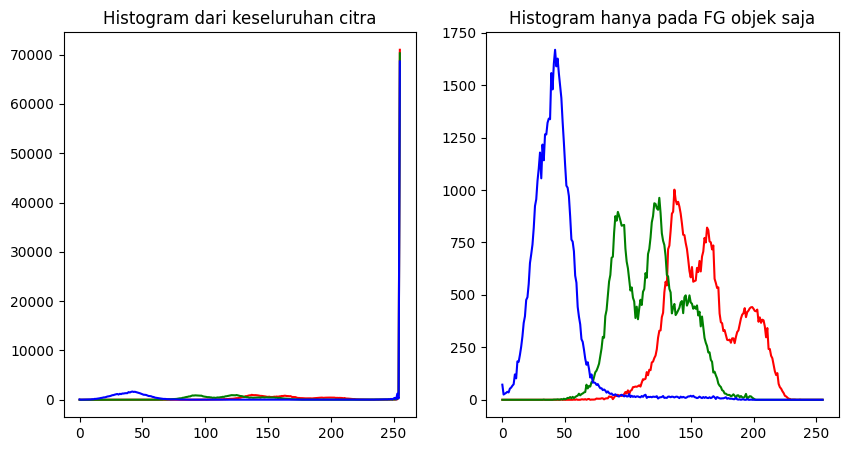

In [6]:
image = cv2.imread('/content/drive/MyDrive/PCVK/images/tobacco.jpg')
image_gray = cv2.imread('/content/drive/MyDrive/PCVK/images/tobacco.jpg',cv2.IMREAD_GRAYSCALE)

# Thresholding untuk mendapatkan foreground
_, mask = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY_INV)

# Menampilkan mask
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask,cmap='gray')
plt.title('Citra Segment')
plt.axis('off')
plt.show()

# Menghitung histogram keseluruhan citra
histogram_b = cv2.calcHist([image], [0], None, [256], [0, 256])
histogram_g = cv2.calcHist([image], [1], None, [256], [0, 256])
histogram_r = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(histogram_r, color='red')
plt.plot(histogram_g, color='green')
plt.plot(histogram_b, color='blue')
plt.title('Histogram dari keseluruhan citra')

# Menghitung histogram hanya pada area foreground (area mask berwarna putih)
histogram_b = cv2.calcHist([image], [0], mask, [256], [0, 256])
histogram_g = cv2.calcHist([image], [1], mask, [256], [0, 256])
histogram_r = cv2.calcHist([image], [2], mask, [256], [0, 256])

# Menampilkan histogram hanya FG saja
plt.subplot(1, 2, 2)
plt.plot(histogram_r, color='red')
plt.plot(histogram_g, color='green')
plt.plot(histogram_b, color='blue')
plt.title('Histogram hanya pada FG objek saja')
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya **warna** tertentu saja)

Centroids warna (RGB):
[[ 63  76  12]
 [253 252 251]
 [251 206   2]
 [200  87  80]
 [172  19  15]
 [209 190 158]
 [132 162  44]]


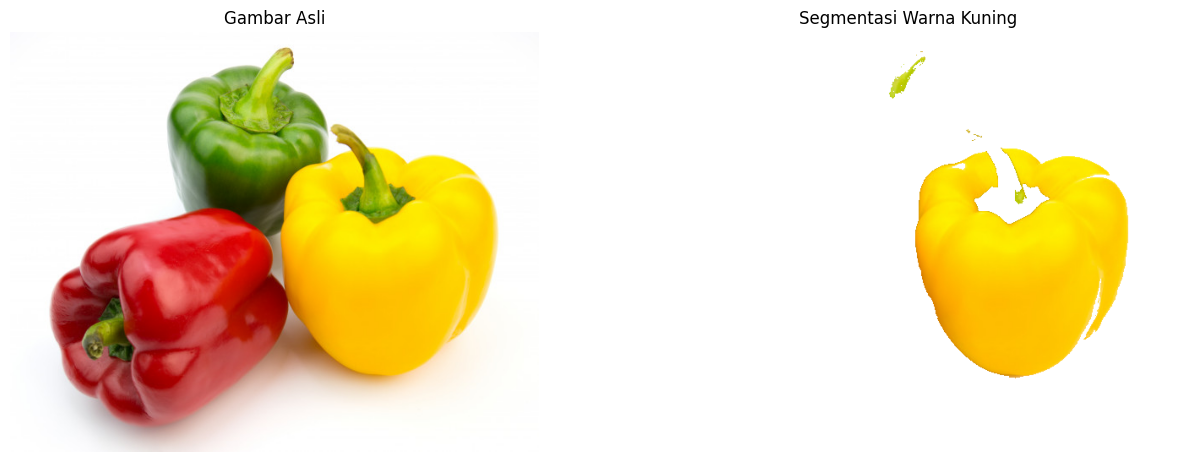

In [7]:
from sklearn.cluster import KMeans

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/images/peppers.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mengubah gambar menjadi array 2D (fitur warna)
pixels = image_rgb.reshape((-1, 3))

# Menggunakan K-Means untuk mengelompokkan warna
k = 7  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Mendapatkan label dan warna centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_.astype(int)

# Menampilkan centroids untuk melihat warna yang ditemukan
print("Centroids warna (RGB):")
print(centroids)

# Menentukan cluster untuk warna kuning (dengan asumsi centroids diinterpretasikan)
# Cluster yang paling mirip dengan warna kuning (contoh RGB: [255, 255, 0])
target_cluster = np.argmin(np.sum(np.abs(centroids - [255, 255, 0]), axis=1))

# Membuat mask untuk menampilkan hanya warna kuning
mask = (labels == target_cluster)
segmented_image = np.ones_like(pixels) * 255
segmented_image[mask] = pixels[mask]

# Mengembalikan array ke bentuk asli gambar
segmented_image = segmented_image.reshape(image_rgb.shape)

# Menampilkan gambar asli dan hasil segmentasi
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmentasi Warna Kuning')
plt.axis('off')
plt.show()


7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

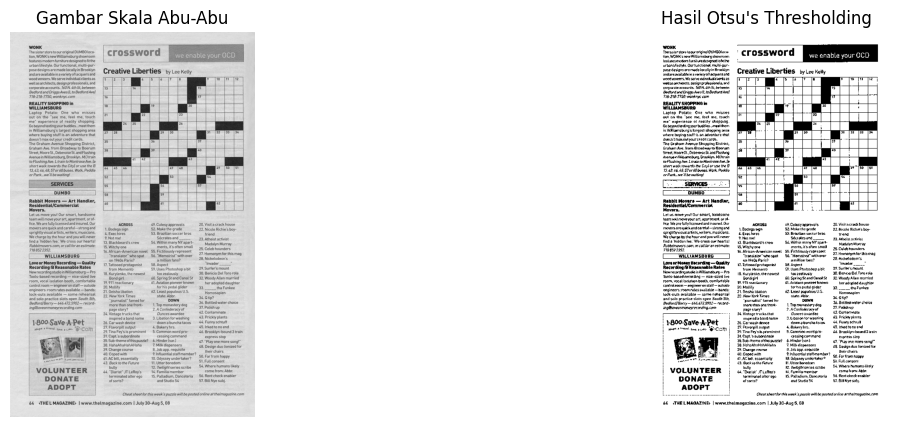

In [8]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/images/crossword.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menerapkan Otsu's thresholding
_, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Gambar Skala Abu-Abu')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Hasil Otsu's Thresholding")
plt.axis('off')

plt.show()